In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv('data/restaurant-scores-lives-standard.csv', sep=",")

In [5]:
data.shape

(53973, 17)

In [6]:
data.dtypes 

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [7]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [8]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


## 1 Обработка пропусков в данных

In [14]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)
print(f'Удалено колонок: {data.shape[1] - data_new_1.shape[1]}')

Удалено колонок: 9


In [13]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)
print(f'Удалено строк: {data.shape[0] - data_new_2.shape[0]}')

Удалено строк: 48262


### 1.1 Обработка пропусков в числовых данных

In [16]:
rows_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / rows_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_latitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36539, 67.7%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 14114, 26.15%.


In [19]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,business_latitude,business_longitude,business_phone_number,inspection_score
0,NaN,NaN,NaN,NaN
1,NaN,NaN,1.415724e+10,96.0
2,NaN,NaN,NaN,88.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,94.0
...,...,...,...,...
53968,NaN,NaN,1.415596e+10,94.0
53969,NaN,NaN,NaN,75.0
53970,NaN,NaN,1.415530e+10,84.0
53971,NaN,NaN,1.415544e+10,83.0


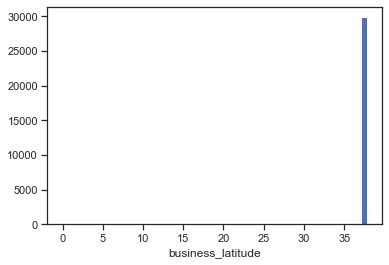

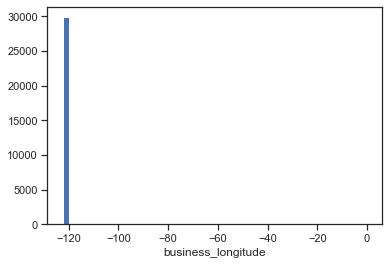

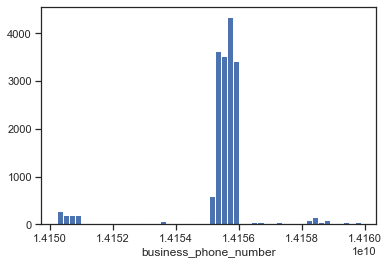

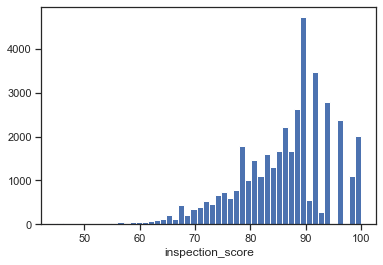

In [23]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [27]:
# Фильтр по пустым значениям поля inspection_score 
data[data['inspection_score'].isnull()]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
5,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN
6,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53955,94521,Joe & The Juice Howard,301 Howard St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,94521_20190509,2019-05-09T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
53957,81789,Koja Kitchen Truck,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,NaN,81789_20190501,2019-05-01T00:00:00.000,NaN,Structural Inspection,NaN,NaN,NaN
53958,98279,LITTLE GEM,2184 UNION ST,San Francisco,CA,94123,NaN,NaN,NaN,1.415729e+10,98279_20190311,2019-03-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN
53961,99249,BLACK SANDS BREWERY,701 HAIGHT ST,San Francisco,CA,94117,NaN,NaN,NaN,NaN,99249_20190503,2019-05-03T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN


In [25]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['inspection_score'].isnull()].index
flt_index

Int64Index([    0,     3,     5,     6,     7,    10,    11,    13,    14,
               15,
            ...
            53932, 53936, 53941, 53945, 53950, 53955, 53957, 53958, 53961,
            53972],
           dtype='int64', length=14114)

In [26]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
5,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN
6,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53955,94521,Joe & The Juice Howard,301 Howard St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,94521_20190509,2019-05-09T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
53957,81789,Koja Kitchen Truck,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,NaN,81789_20190501,2019-05-01T00:00:00.000,NaN,Structural Inspection,NaN,NaN,NaN
53958,98279,LITTLE GEM,2184 UNION ST,San Francisco,CA,94123,NaN,NaN,NaN,1.415729e+10,98279_20190311,2019-03-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN
53961,99249,BLACK SANDS BREWERY,701 HAIGHT ST,San Francisco,CA,94117,NaN,NaN,NaN,NaN,99249_20190503,2019-05-03T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN


In [28]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['inspection_score']

0       NaN
3       NaN
5       NaN
6       NaN
7       NaN
         ..
53955   NaN
53957   NaN
53958   NaN
53961   NaN
53972   NaN
Name: inspection_score, Length: 14114, dtype: float64

In [29]:
data_num_inspection_score = data_num[['inspection_score']]
data_num_inspection_score.head()

,inspection_score
0,NaN
1,96.0
2,88.0
3,NaN
4,94.0


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [32]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_inspection_score)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [33]:
strategies=['mean', 'median','most_frequent']

In [34]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [63]:
data[['inspection_score']].describe()

,inspection_score
count,39859.000000
mean,86.235254
std,8.480003
min,45.000000
25%,81.000000
50%,88.000000
75%,92.000000
max,100.000000


In [64]:
data[['business_latitude']].describe()

,business_latitude
count,29878.000000
mean,37.755265
std,0.788075
min,0.000000
25%,37.756771
50%,37.780174
75%,37.788882
max,37.824494


In [65]:
data[['business_longitude']].describe()

,business_longitude
count,29878.000000
mean,-122.373755
std,2.553357
min,-122.510896
25%,-122.437091
50%,-122.419136
75%,-122.407417
max,0.000000


In [57]:
for strategy in strategies:
    print(test_num_impute_col(data, 'inspection_score', strategy))
    print(test_num_impute_col(data, 'business_latitude', strategy))
    print(test_num_impute_col(data, 'business_longitude', strategy), end='\n\n')

('inspection_score', 'mean', 14114, 86.23525427130636, 86.23525427130636)
('business_latitude', 'mean', 24095, 37.7552651997791, 37.7552651997791)
('business_longitude', 'mean', 24095, -122.37375472595221, -122.37375472595221)

('inspection_score', 'median', 14114, 88.0, 88.0)
('business_latitude', 'median', 24095, 37.780174, 37.780174)
('business_longitude', 'median', 24095, -122.41913600000001, -122.41913600000001)

('inspection_score', 'most_frequent', 14114, 90.0, 90.0)
('business_latitude', 'most_frequent', 24095, 37.808240000000005, 37.808240000000005)
('business_longitude', 'most_frequent', 24095, -122.41018899999999, -122.41018899999999)



### 1.2 Обработка пропусков в категориальных данных

In [66]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / rows_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1083, 2.01%.
Колонка business_location. Тип данных object. Количество пустых значений 24095, 44.64%.
Колонка violation_id. Тип данных object. Количество пустых значений 13462, 24.94%.
Колонка violation_description. Тип данных object. Количество пустых значений 13462, 24.94%.
Колонка risk_category. Тип данных object. Количество пустых значений 13462, 24.94%.


In [68]:
cat_temp_data = data[['risk_category']]
cat_temp_data.head()

,risk_category
0,Moderate Risk
1,Moderate Risk
2,Moderate Risk
3,NaN
4,Moderate Risk


In [69]:
cat_temp_data['risk_category'].unique()

array(['Moderate Risk', nan, 'Low Risk', 'High Risk'], dtype=object)

In [70]:
cat_temp_data[cat_temp_data['risk_category'].isnull()].shape

(13462, 1)

In [71]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Moderate Risk'],
       ['Moderate Risk'],
       ['Moderate Risk'],
       ...,
       ['Moderate Risk'],
       ['High Risk'],
       ['Low Risk']], dtype=object)

In [72]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

In [74]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Moderate Risk'],
       ['Moderate Risk'],
       ['Moderate Risk'],
       ...,
       ['Moderate Risk'],
       ['High Risk'],
       ['Unknown']], dtype=object)

In [75]:
np.unique(data_imp3)

array(['High Risk', 'Low Risk', 'Moderate Risk', 'Unknown'], dtype=object)

In [76]:
data_imp3[data_imp3=='Unknown'].size

13462

## 2 Преобразование категориальных признаков в числовые

In [77]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Moderate Risk
1,Moderate Risk
2,Moderate Risk
3,Low Risk
4,Moderate Risk
...,...
53968,Low Risk
53969,Moderate Risk
53970,Moderate Risk
53971,High Risk


### 2.1 Кодирование категорий целочисленными значениями

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [80]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['Moderate Risk', 'Low Risk', 'High Risk'], dtype=object)

In [81]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [82]:
le.inverse_transform([0, 1, 2])

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

### 2.2 Кодирование категорий наборами бинарных значений

In [83]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(53973, 1)

In [84]:
cat_enc_ohe.shape

(53973, 3)

In [85]:
cat_enc_ohe

<53973x3 sparse matrix of type '<class 'numpy.float64'>'
	with 53973 stored elements in Compressed Sparse Row format>

In [86]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [87]:
cat_enc.head(10)

,c1
0,Moderate Risk
1,Moderate Risk
2,Moderate Risk
3,Low Risk
4,Moderate Risk
5,Low Risk
6,Low Risk
7,Low Risk
8,Low Risk
9,Low Risk


### 2.3 Быстрый вариант one-hot кодирования

In [88]:
pd.get_dummies(cat_enc).head()

,c1_High Risk,c1_Low Risk,c1_Moderate Risk
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [89]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,risk_category_High Risk,risk_category_Low Risk,risk_category_Moderate Risk,risk_category_nan
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


## 3 Масштабирование данных

#### Заменяю пропуски в колонке 'inspection_score' исходного датасета, чтобы использовать ее для масштабирования/нормализации

In [109]:
def num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
#     data_num_imp = imp_num.fit_transform(dataset[[column]])
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    new_data = imp_num.transform(dataset[[column]])
    
    return new_data


In [110]:
num_impute_col(data, 'inspection_score', 'mean')

array([[86.23525427],
       [96.        ],
       [88.        ],
       ...,
       [84.        ],
       [83.        ],
       [86.23525427]])

In [115]:
data[['inspection_score']] = num_impute_col(data, 'inspection_score', 'mean')

In [116]:
data[['inspection_score']]

,inspection_score
0,86.235254
1,96.000000
2,88.000000
3,86.235254
4,94.000000
...,...
53968,94.000000
53969,75.000000
53970,84.000000
53971,83.000000


### 3.1 MinMax масштабирование

In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [125]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])

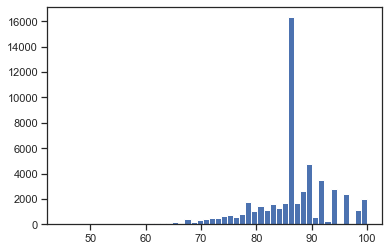

In [126]:
plt.hist(data['inspection_score'], 50)
plt.show()

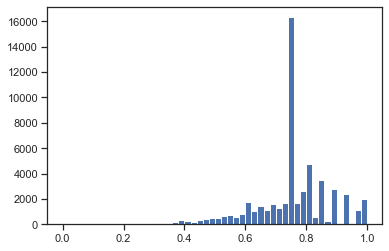

In [127]:
plt.hist(sc1_data, 50)
plt.show()

### 3.2 Масштабирование данных на основе Z-оценки

In [128]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['inspection_score']])

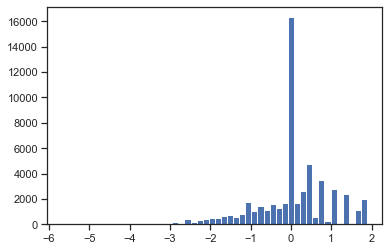

In [129]:
plt.hist(sc2_data, 50)
plt.show()

### 3.3. Нормализация данных

In [130]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['inspection_score']])

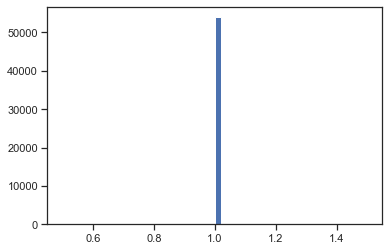

In [131]:
plt.hist(sc3_data, 50)
plt.show()